# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [310]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy
import statsmodels.stats.weightstats as wstats

df = pd.read_csv('data/human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0



<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
</li>
</ol>

<h1>CENTRAL LIMIT THEOREM</h1>
<h3>For independent random variables</h3>
<p>
<ul style="color:blue;font-size:1.5em;">
    <li>
<b>
   For any given Distribution, sampling distribution of sample means will be normally distributed (as n gets larger)
</b>
</li><br>
<li>
<b>
   Mean of the sampling distribution of sample means will be equal to mean of original distribution
</b>
</li>
    <br>
    <li>
<b>
   Standard Deviation of sampling distribution of sample mean will be equal to <br>
    (Std. Deviation of original distribution)/ SQRT(Sample Size)
</b>
</li>
    <br>
</ul>
</p>

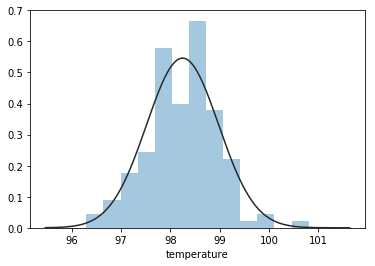

In [62]:
sns.distplot(df['temperature'],kde=False, fit=stats.gamma);

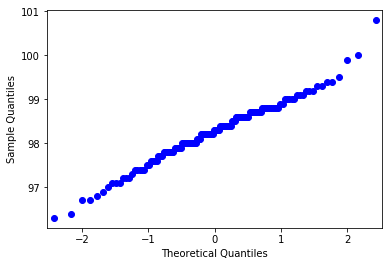

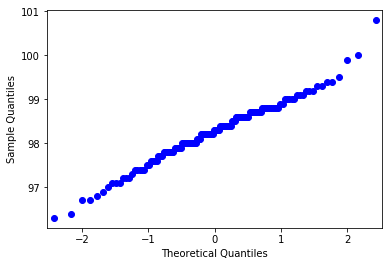

In [299]:
from statsmodels.graphics.gofplots import qqplot
qqplot(numpy.array(df['temperature']))

<p style="color:blue;font-size:1.5em;"><b>Based on the QQ Plot and Histograms above we can conclude, the distribution is seemingly Normal </b></p>

In [143]:
from scipy import stats
# Null Hypothesis is the distribution of temeratures is Normal distribution
def normalityTest(temperatures):
    k2, p = stats.normaltest(temperatures)

    alpha = 1e-3
    print("p = {:g}".format(p))
    
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print("The null hypothesis can be rejected - distribution is Not Normal")
    else:
        print("The null hypothesis cannot be rejected - distribution is Normal")

In [144]:
normalityTest(df['temperature'])

p = 0.258748
The null hypothesis cannot be rejected - distribution is Normal


<b><li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul></b>

<p>
<ul style="color:blue;font-size:1.5em;">
<li>
<b>
    Sample Size for this Exercise is large , sample size greater than 30 is considered large.
</b>
</li>
    <br>
    <li>
<b>
    Observations are independent
</b>
</li>
    <br>
<li>
<b>One-sample test is applicable in this case. A two-sample t-test is applied to compare whether the average difference between two groups is really significant or if it is just a random chance.</b>
</li>
</ul>
</p>

<b><li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul></b>

In [145]:
#Hypothesisis Test 
#h0 = mean temperature is 98.6
#ha = mean temperature is not equal to 98.6 , may be greater than or less than 98.6

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

In [332]:
def testHypothesis(temperatures):
    translated = temperatures-np.mean(temperatures)+98.6
    bs_diff_replicates = draw_bs_reps(translated,np.mean,1000)
    plt.hist(bs_diff_replicates)

    val = np.sum(bs_diff_replicates == 98.6)
    p = np.float(val)/1000
    print("p for hypothesis tests = {:g}".format(p))
    alpha = 0.05
    if p < alpha: 
        print("The null hypothesis can be rejected - mean temerature is not 98.6")
    else:
        print("The null hypothesis cannot be rejected - mean temerature is 98.6")

p = 0.001
The null hypothesis can be rejected - mean temerature is not 98.6


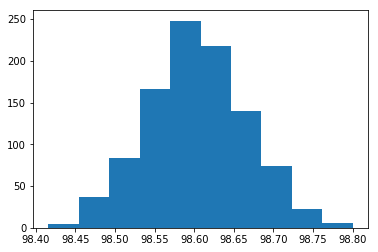

In [147]:
testHypothesis(df['temperature'])

In [342]:
# t-test X-Mu/(s/Sqrt(n))
# z-test X-Mu/(s/sqrt(n)) or X-Mu/row
def statisticaltest(temperature):
    diff_mean = 98.6 - np.mean(temperature)
    s = np.std(temperature)
    n = len(temperature)
    sqrt_n = np.sqrt(n)
    val = diff_mean/(s/sqrt_n)
    pval1 = stats.t.sf(np.abs(val), n-1)*2 # 2 tailed as the alternative hypothesis is a "Not equals to"
    pval2 = stats.norm.sf(abs(val))*2#stats.z(np.abs(tval), n-1)*2
    print("p value for t test = {:g}".format(pval1))
    print("p value for z test = {:g}".format(pval2))

In [343]:
# calculated t-test and z-test
statisticaltest(df['temperature'])

p value for t test = 2.18875e-07
p value for z test = 4.35232e-08


In [344]:
# python t-test
z,p = stats.ttest_1samp(df['temperature'],98.6)
print("p value for t test = {:g}".format(p))

p value for t test = 2.41063e-07


In [345]:
# python z-test
z,p = wstats.ztest(df['temperature'],value=98.6,usevar='pooled',ddof=1.0)
print("p value for z test = {:g}".format(p))

p value for z test = 4.90216e-08


<p style="color:blue;font-size:1.5em;"><b>
    Observations : p value for z-test is lower than t-test
    </b></p>

<p><b>
    <ul style="color:blue;font-size:1.5em;">
    <li>As population standard deviation is not provided, t-test must be used instead of z-test</li>
    <li>The null hypothesis can be rejected as p value is less than alpha (0.05) (i.e mean temerature is not 98.6)</li>
    </ul></b></p>

<b><li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul></b>

In [334]:
temperatures = np.random.choice(df['temperature'], size = 10)
# python t-test
t,p1 = stats.ttest_1samp(temperatures,98.6)
print("p value for t-test = {:g}".format(p1))
# python z-test
z,p2 = wstats.ztest(temperatures,value=98.6,usevar='pooled',ddof=1.0)
print("p value for z-test = {:g}".format(p2))


p value for t-test = 0.063577
p value for z-test = 0.0344509


In [336]:
statisticaltest(temperatures)

p value for t test = 0.0527703
p value for z test = 0.0258042


<p style="color:blue;font-size:1.5em;"><b>Increasing the sample size will tend to result in a smaller P-value only if the null hypothesis is false. Hence, we can conclude 98.6 cannot the population mean</b></p>

<b><li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul></b>

In [318]:
temperatures = df['temperature']
bs_diff_replicates = draw_bs_reps(temperatures,np.mean,1000)
np.percentile(bs_diff_replicates, [2.5, 97.5])

array([98.13378846, 98.38082692])

In [354]:
# 95 % confidence level & 2 tailed test
z_criticalvalue = stats.norm.ppf(0.975)
t_criticalvalue = stats.t.sf(0.975,len(df['temperature'])-1)
# standard error = std/sqrt(sample size)
se = np.std(df['temperature'])/np.sqrt(len(df['temperature']))


me = t_criticalvalue * se

# confidence interval for 95%
print("p value for t-test = {:s}".format([np.mean(df['temperature'])-me,np.mean(df['temperature'])+me]))


me = z_criticalvalue * se

# confidence interval for 95%
print("p value for z-test = {:s}".format([np.mean(df['temperature'])-me,np.mean(df['temperature'])+me]))


p value for t-test = [98.23861706684458, 98.25984447161697]
p value for z-test = [98.12368211145665, 98.37477942700491]


<p style="color:blue;font-size:1.5em;"><b>Temperatures not in confidence interval are considered abnormal</b><br>
<b>confidence interval for t-test is smaller compared to z-test</b></p>

In [238]:
male_df = df[df['gender']=='M']
female_df = df[df['gender']=='F']

combined_mean = np.mean(df['temperature'])

male_df_shifted = male_df['temperature'] - np.mean(male_df['temperature'])+combined_mean

female_df_shifted = female_df['temperature'] - np.mean(female_df['temperature'])+combined_mean

# Get bootstrap replicates of shifted data sets
bs_replicates_male = draw_bs_reps(male_df_shifted,np.mean,10000)
bs_replicates_female = draw_bs_reps(female_df_shifted,np.mean,10000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_female-bs_replicates_male

# Compute the p-value
mean_diff = np.abs(np.mean(male_df['temperature']) - np.mean(female_df['temperature']))
print('mean diff : ',mean_diff,', bs_diff_replicates : ',bs_diff_replicates)
p = np.sum(bs_diff_replicates > mean_diff)*1.0 / len(bs_diff_replicates)

# Print p-value
alpha = 0.05
if p < alpha: 
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

('mean diff : ', 0.289230769230727, ', bs_diff_replicates : ', array([-0.02923077,  0.10769231,  0.02923077, ..., -0.14      ,
        0.26307692,  0.04461538]))
The null hypothesis can be rejected


In [236]:
male_var = np.var(male_df['temperature']) ** 2

female_var = np.var(female_df['temperature']) ** 2

denominator = np.sqrt(male_var/len(male_df['temperature']) + female_var/len(female_df['temperature']))

T = mean_diff/denominator
if T > 1.96: 
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

The null hypothesis can be rejected


<p style="color:blue;font-size:1.5em;"><b>Null Hypothesis can be rejected as there is a significant difference between male and female temperatures</b></p>